In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


*  h=delta_x=delta_y es decir a los cambios locales
*  intervalos: x esta [0,a] ; y esta [0,b]
*  cuantos valores de x necesito:
Nx= longitud del intervalo/los pasos = (x_max-x_min)/h = (a-0)/h  
*  cuantos valores de y necesito:
My= longitud del intervalo/los pasos = (y_max-y_min)/h = (b-0)/h
*  Barrer los elementos de la matriz:
x= x_min + ih
y= y_min + jh

*  Aplicando la formula:
- i,j = el punto en el centro
- i+1,j = el punto en la derecha
- i-1,j = el punto en la izquierda
- i,j+1 = el punto arriba
- i,j-1= el punto abajo



Estructura del programa:
* Matriz que guarde la informacion (1D) y represente el potencial V
* Funciones
- Condiciones de frontera: Una funcion que de las condiciones del sistema
- Evolución: que recibe toda la matriz y hace un paso en toda. En donde se tiene en cuenta la condicion de frontera. Cuando se recorra la matriz toca colocar un if para verificar si es frontera o no
- Imprimir y graficar

* Condiciones iniciales y confirmar que no importan mientras se tengan las condiciones de frontera siempre se llega al mismo valor





In [ ]:
class Potencial:
  def __init__(self):
    #Matriz sobre la que se va a calcular el potencial
    self.matriz= list()

    #Extensión de la matriz
    self.Nx = 0
    self.My = 0

  """Función que crea la matriz e inicializa todos sus valores (incluyendo los internos) arbitrariamente"""
  def create_matriz(self, x_min, a, y_min, b, h):

    self.Nx= int((a - x_min)/h)
    self.My= int((b - y_min)/h)

    for i in range(self.Nx):
      columna= np.random.rand(self.My)
      self.matriz.append(columna)

    self.matriz = np.array(self.matriz)

  """Función que asigna las condiciones de frontera según V0(x,y)"""
  def set_fronteras(self, V0_plus, V0_minus):

    for i in range(self.Nx):
      for j in range(self.My):

        if(i == 0 or i == (self.Nx - 1)):
          self.matriz[i][j] = 0

        elif(j == 0):
          self.matriz[i][j] = V0_minus

        elif(j == self.My - 1):
          self.matriz[i][j] = V0_plus

  #Promedio de los valores vecinos
  def promedio(self, i,j):
    self.matriz[i][j]= ((self.matriz[i+1][j])+(self.matriz[i-1][j])+(self.matriz[i][j+1])+(self.matriz[i][j-1]))/4

  """Se recorre la matriz y se soluciona el potencial usando el método de diferencias finitas con relajación"""
  def recorrido(self, epsilon):
    max_diff = np.inf

    while(max_diff > epsilon):

      #Recorremos los puntos internos de la red y evaluamos el promedio
      max_diff = 0
      for i in range(1, self.Nx - 1):
        for j in range(1, self.My - 1):

          #Anterior al promedio
          old_value = self.matriz[i][j]

          #Calculamos el promedio en este punto
          self.promedio(i, j)

          diff = abs(self.matriz[i][j] - old_value)
          if(diff > max_diff):
            max_diff = diff


  def print_matriz(self, r):
    for i in range(self.Nx):
      for j in range(self.My):
        self.matriz[i][j] = round(self.matriz[i][j], r)

    print(self.matriz)


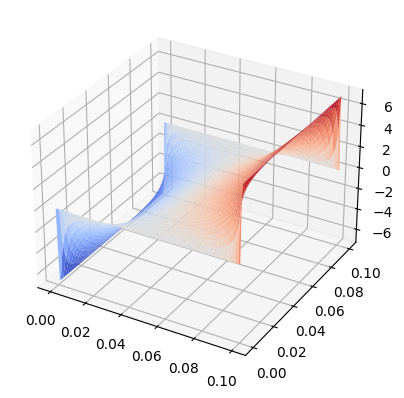

In [ ]:
#Numérico

a = 0.1
b = 0.1
h = 0.001

potencial = Potencial()


grid= potencial.create_matriz(0, a, 0 ,b, h)
grid= potencial.set_fronteras(7, -7)
grid= potencial.recorrido(epsilon = 10e-4)

x = np.linspace( 0,0.1,100)
y = np.linspace(0, 0.1,100)
X,Y = np.meshgrid(x,y)
Z = potencial.matriz

fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)



-1.3407213734569638


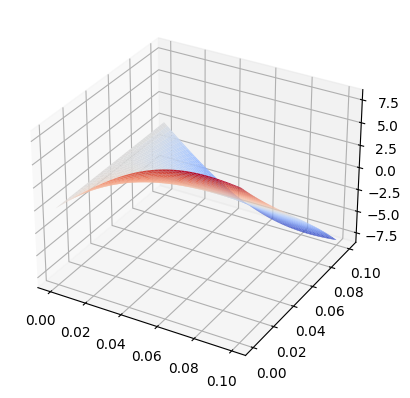

In [ ]:
# Analítico

def v(x, y, V0, N):
  V = 0
  for n in range(1, N):
    Tn = (-2*V0*(-(-1)**n+1))/(n*np.pi)
    Pn= (2*V0*(-(-1)**n+1)*(1+np.cosh(n*np.pi*b)))/(np.sinh(b*n*np.pi)*n*np.pi)
    V += Pn*np.sin(x*n*np.pi)*np.sinh(y*n*np.pi) + Tn*np.sin(x*n*np.pi)*np.cosh(y*n*np.pi)
  return V

a = 0.1
b = 0.1
h = 0.001

potencial = Potencial()
print(v(0.06, 0.04, 7,  100))

grid= potencial.create_matriz(0, a, 0 ,b, h)
grid= potencial.set_fronteras(7, -7)
grid= potencial.recorrido(epsilon = 10e-4)

x = np.linspace( 0,0.1,100)
y = np.linspace(0, 0.1,100)
X,Y = np.meshgrid(x,y)
Z = v(X, Y, -7, 1200)

fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
